In [1]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

np.random.seed(42)

In [2]:
clients_data = pd.read_csv('clients_data.csv')
clients_data.head(3)

,client_id,buyer/non-buyer
0,1247,Buyer
1,1262,Buyer
2,1277,Buyer


In [3]:
clients_data['buyer/non-buyer'].value_counts()

Buyer        334
Non-buyer    166
Name: buyer/non-buyer, dtype: int64

### **Finding the probabilities that associated with each group**

let A be client being a buyer, and B client being non-buyer 

P(A) = Number of favorable outcomes/ total of the outcomes

P(B) = 1 - P(A)

In [4]:
n_buyer = 334
#the total number of outcomes is 500
prob_buy = n_buyer/500
#the probability of buyer
round(prob_buy*100)

67

In [5]:
prob_nonbuy = 1 - prob_buy
#the probability of non-buyer
round(prob_nonbuy*100)

33

In [6]:
#sum of probabilities must equal 1 
sum_of_probs = prob_buy + prob_nonbuy
sum_of_probs

1.0

*The probability of new client being a buyer is : 67%*

*The probability of new client being a non-buyer is : 33%*

# **Applying Bernoulli Distribution**

*When we want to find the probability that the customer will turn into a buyer.*

In [7]:
import scipy.stats as stats 
from scipy.stats import bernoulli

In [8]:
def bernoulli_func(p):
    """function that return a probability of only two
    possible outcomes (success/failure)
    of single trail, where here 0 = number of fails
    and 1 is number of success"""
    x = [0,1]
    bernoulli_trail = bernoulli(p).pmf(x)
    return bernoulli_trail

In [9]:
#our interest(event) to find out if new client will be a buyer 
bernoulli_func(0.67)

array([0.33, 0.67])

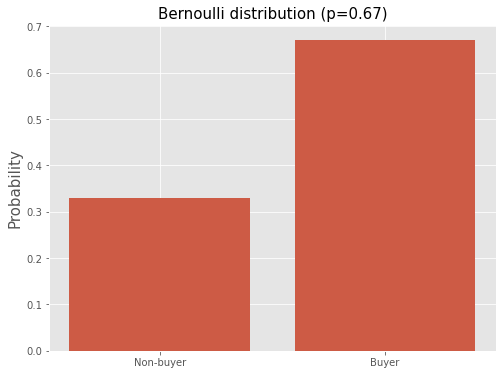

In [10]:
plt.style.use('ggplot')

labels = ['Non-buyer','Buyer']
plt.figure(figsize=(8,6))
plt.bar(labels, bernoulli_func(0.67), color='#CD5B45')

plt.title('Bernoulli distribution (p=0.67)', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

**Conclusion** :

There is a **67%** chance that the customer will turn into a buyer and that is what most likely will happen..

# **Applying binomial distribution**

*When we want to find the probablity for more than single client : buyer/non-buyer*

**Assumptions of binomial distribution**
- A fixed number of trials
- Each trial is independent of the others
- There are only two outcomes
- The probability of each outcome remains constant from trial to trial.

In [11]:
from scipy.stats import binom

def binomial_func(n, p, k):
    """ define a function that take a sample size(n)
    , probability of success(p) and the random variable x or
    sample space (k)to return the probability 
    of more than single trail"""
    binomial_trails = binom.pmf(k=k, n=n, p=p)
    return binomial_trails
def binom_left_cumulative_func(k, n, p):
    """function that return the cumulative probability 
    at less than or as maximum of trails- left region of the distribution"""
    cd = binom.cdf(k,n,p)
    return cd*100
def binom_right_cumulative_func(k, n, p):
    """function that return the cumulative probability 
    at more than or at least of trails - right region of the distribution"""
    cd = 1 - binom.cdf(k,n,p)
    return cd*100

In [12]:
binomial_func(100, 0.67, np.arange(0,101))[0:2]

array([7.10221782e-49, 1.44196544e-46])

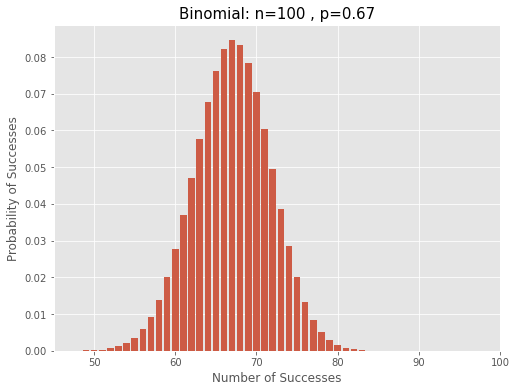

In [13]:
#in array results it's hard to tell which most likely will happen, so we need to visualize our results..plt.figure(figsize=(10,8))
plt.figure(figsize=(8,6))
plt.bar(np.arange(0,101), binomial_func(100, 0.67, np.arange(0,101)), color='#CD5B45')
plt.xlim(45, 100)#ZOOM IN 
plt.title("Binomial: n=%i , p=%.2f" % (100, 0.67), fontsize=15) 
plt.xlabel("Number of Successes") 
plt.ylabel("Probability of Successes") 
plt.show() 

**Insights** :  

- Poisson distribution: the binomial distribution approaches a normal distribution as the sample size increases. 

- There's a zero possibility that the customers who will become buyers will be less than 48 and more than 85 customers.

- Out of 100 clients , what more likely will happen is the business will end up having approximately 66 buyers.

In [14]:
binomial_func(100, 0.67, np.arange(0,101))[66]*100

8.210617022593143

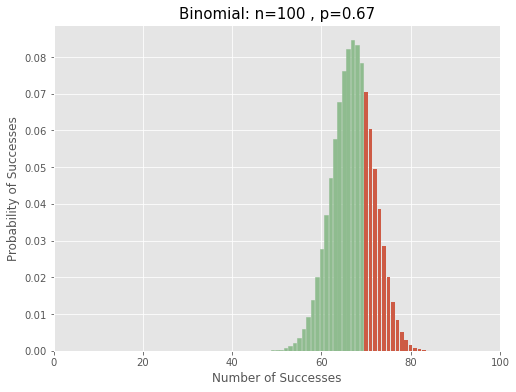

In [15]:
plt.figure(figsize=(8,6))
bar_chart = plt.bar(np.arange(0,101), binomial_func(100, 0.67, np.arange(0,101)), color='#CD5B45')
plt.xlim(0, 100)
plt.title("Binomial: n=%i , p=%.2f" % (100, 0.67), fontsize=15) 
plt.xlabel("Number of Successes") 
plt.ylabel("Probability of Successes") 
for i in range(0, 70):
    bar_chart[i].set_color('#8FBC8F')
plt.show()

In [16]:
binom_left_cumulative_func(70, 100, 0.67)

76.99435901428465

**Insight**: there's a **77%** chance that a maximum of 70 customers out of 100 will become buyers.

### **The probability of having more than 65 (or at least 66) clients become a buyers**

In [17]:
binom_right_cumulative_func(65, 100, 0.67)

62.91543034642609

**Insight**: there's a **63%** chance that at least 66 clients out of 100 will become buyers.